In [1]:
using Plots
using LinearAlgebra

In [2]:
# Birds chirping data
# http://www.cs.cornell.edu/~bindel/class/sjtu-summer18/lec/2018-06-13.pdf
# http://mste.illinois.edu/

# bird chirps per 15 seconds
chirp_cnts = [20, 16, 20, 18, 17, 16, 15, 17, 15, 16, 15, 17, 16, 17, 14]  
# temperatures (F)
temps = [89, 72, 93, 84, 81, 75, 70, 82, 69, 83, 80, 83, 81, 84, 76]

# put in sorted order for plotting
sp = sortperm(chirp_cnts)
chirp_cnts = chirp_cnts[sp]
b = temps[sp]; # match lecture note notation

In [3]:
scatter(chirp_cnts, temps, 
        xlabel="chirp counts", ylabel="temperature (F)", 
        markersize=5, color=:black, label="")
A = [chirp_cnts ones(length(chirp_cnts))];

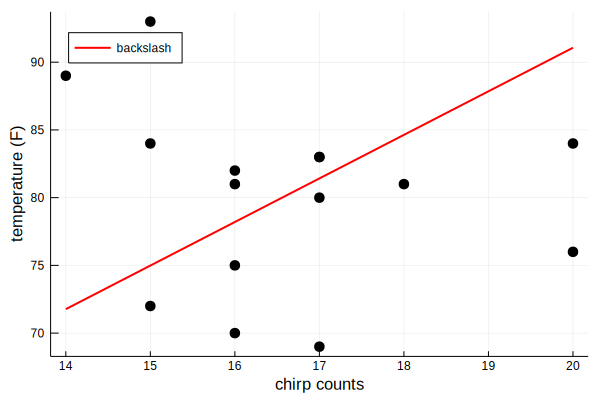

In [4]:
x_backslash = A \ b
plot!(chirp_cnts, A * x_backslash, lw=2, color="red", label="backslash", legend=:topleft)

In [5]:
r = A * x_backslash - b;  # residual error
norm(A' * r, 2) 

4.270923382035174e-12

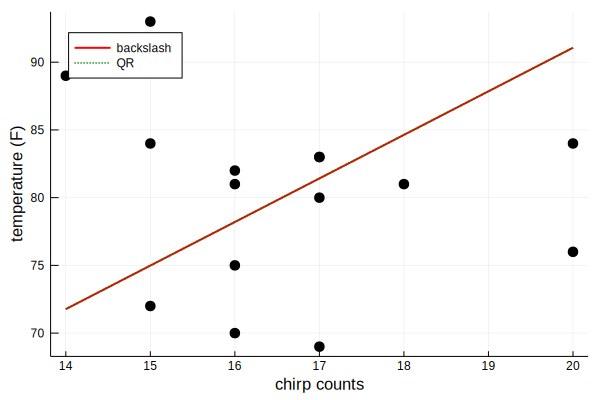

In [6]:
Q, R = qr(A)
x_qr = R \ (Matrix(Q)' * b)
plot!(chirp_cnts, A * x_qr, lw=2, ls=:dot, color="green", label="QR", legend=:topleft)

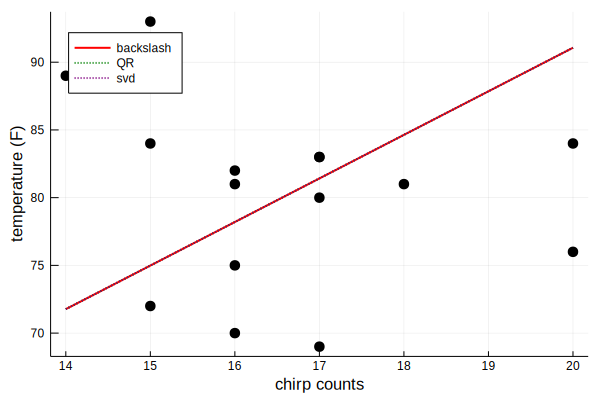

In [7]:
U, Σ, V = svd(A)
x_svd = V * (Diagonal(Σ) \ (U' * b))
plot!(chirp_cnts, A * x_svd, lw=2, ls=:dot, color="purple", label="svd", legend=:topleft)